# **I have preprocessed the whole dataset to make it into my desired form and stored in my drive.I am using the stored dataset.**

In [2]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import networkx as nx
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import numpy as np

from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [6]:
df_flight=pd.read_csv('/content/drive/My Drive/Dataset/flights2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
airports=pd.read_csv('/content/drive/My Drive/Dataset/airports.csv')

In [8]:
df_flight.head()

,Unnamed: 0,Date,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,ARRIVAL_DELAY,CANCELLED,WEATHER_DELAY_NEW,LATE_AIRCRAFT_DELAY_NEW,AIRLINE_DELAY_NEW,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,0,2015-01-01,4,AS,98,N407AS,ANC,SEA,-11.0,21.0,1448,4.0,-22.0,0,-3.90,-0.04,12.88,00:05,23:54,04:30,04:08
1,1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,-8.0,12.0,2330,4.0,-9.0,0,-2.80,1.03,12.74,00:10,00:02,07:50,07:41
2,2,2015-01-01,4,US,840,N171US,SFO,CLT,-2.0,16.0,2296,11.0,5.0,0,-1.63,3.17,12.67,00:20,00:18,08:06,08:11
3,3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,-5.0,15.0,2342,8.0,-9.0,0,-2.80,2.10,12.71,00:20,00:15,08:05,07:56
4,4,2015-01-01,4,AS,135,N527AS,SEA,ANC,-1.0,11.0,1448,5.0,-21.0,0,-3.81,3.53,12.69,00:25,00:24,03:20,02:59


In [9]:
df=pd.DataFrame()
df[['YEAR','MONTH','DAY']] = df_flight.Date.str.split("-",expand=True)
df.head()

,YEAR,MONTH,DAY
0,2015,01,01
1,2015,01,01
2,2015,01,01
3,2015,01,01
4,2015,01,01


In [10]:
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   YEAR    int64
 1   MONTH   int64
 2   DAY     int64
dtypes: int64(3)
memory usage: 130.8 MB


In [0]:
df_flight=pd.concat([df_flight,df[['MONTH','DAY']]],axis=1)

In [0]:
df_flight=df_flight.drop(['CANCELLED'],axis=1)

In [13]:
df_flight=df_flight.drop(['Unnamed: 0'],axis=1)
df_flight.head()

,Date,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,ARRIVAL_DELAY,WEATHER_DELAY_NEW,LATE_AIRCRAFT_DELAY_NEW,AIRLINE_DELAY_NEW,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,MONTH,DAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,-11.0,21.0,1448,4.0,-22.0,-3.90,-0.04,12.88,00:05,23:54,04:30,04:08,1,1
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,-8.0,12.0,2330,4.0,-9.0,-2.80,1.03,12.74,00:10,00:02,07:50,07:41,1,1
2,2015-01-01,4,US,840,N171US,SFO,CLT,-2.0,16.0,2296,11.0,5.0,-1.63,3.17,12.67,00:20,00:18,08:06,08:11,1,1
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,-5.0,15.0,2342,8.0,-9.0,-2.80,2.10,12.71,00:20,00:15,08:05,07:56,1,1
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,-1.0,11.0,1448,5.0,-21.0,-3.81,3.53,12.69,00:25,00:24,03:20,02:59,1,1


In [14]:
df_flight.shape

(5714008, 21)

In [15]:


column_names=['Date','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','DESTINATION_AIRPORT','SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_DELAY','DISTANCE','AIRLINE','FLIGHT_NUMBER','TAIL_NUMBER','TAXI_IN','TAXI_OUT','AIRLINE_DELAY_NEW','LATE_AIRCRAFT_DELAY_NEW','WEATHER_DELAY_NEW','MONTH','DAY','DAY_OF_WEEK']
df_flight = df_flight.reindex(columns=column_names)
df_flight.head()


,Date,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DISTANCE,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,TAXI_IN,TAXI_OUT,AIRLINE_DELAY_NEW,LATE_AIRCRAFT_DELAY_NEW,WEATHER_DELAY_NEW,MONTH,DAY,DAY_OF_WEEK
0,2015-01-01,ANC,00:05,23:54,-11.0,SEA,04:30,04:08,-22.0,1448,AS,98,N407AS,4.0,21.0,12.88,-0.04,-3.90,1,1,4
1,2015-01-01,LAX,00:10,00:02,-8.0,PBI,07:50,07:41,-9.0,2330,AA,2336,N3KUAA,4.0,12.0,12.74,1.03,-2.80,1,1,4
2,2015-01-01,SFO,00:20,00:18,-2.0,CLT,08:06,08:11,5.0,2296,US,840,N171US,11.0,16.0,12.67,3.17,-1.63,1,1,4
3,2015-01-01,LAX,00:20,00:15,-5.0,MIA,08:05,07:56,-9.0,2342,AA,258,N3HYAA,8.0,15.0,12.71,2.10,-2.80,1,1,4
4,2015-01-01,SEA,00:25,00:24,-1.0,ANC,03:20,02:59,-21.0,1448,AS,135,N527AS,5.0,11.0,12.69,3.53,-3.81,1,1,4


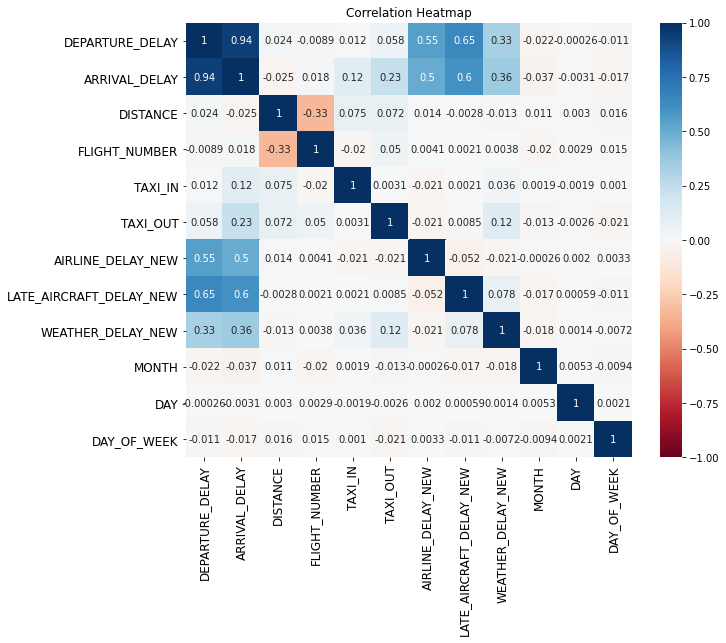

In [16]:
plt.figure(figsize=(10,8))
s=sns.heatmap(df_flight.corr(),
             annot=True,
             cmap='RdBu',
             vmin=-1, 
             vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

In [0]:
#decisiom trees and ridge regression

In [18]:
x=df_flight.copy()
x.head()

,Date,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DISTANCE,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,TAXI_IN,TAXI_OUT,AIRLINE_DELAY_NEW,LATE_AIRCRAFT_DELAY_NEW,WEATHER_DELAY_NEW,MONTH,DAY,DAY_OF_WEEK
0,2015-01-01,ANC,00:05,23:54,-11.0,SEA,04:30,04:08,-22.0,1448,AS,98,N407AS,4.0,21.0,12.88,-0.04,-3.90,1,1,4
1,2015-01-01,LAX,00:10,00:02,-8.0,PBI,07:50,07:41,-9.0,2330,AA,2336,N3KUAA,4.0,12.0,12.74,1.03,-2.80,1,1,4
2,2015-01-01,SFO,00:20,00:18,-2.0,CLT,08:06,08:11,5.0,2296,US,840,N171US,11.0,16.0,12.67,3.17,-1.63,1,1,4
3,2015-01-01,LAX,00:20,00:15,-5.0,MIA,08:05,07:56,-9.0,2342,AA,258,N3HYAA,8.0,15.0,12.71,2.10,-2.80,1,1,4
4,2015-01-01,SEA,00:25,00:24,-1.0,ANC,03:20,02:59,-21.0,1448,AS,135,N527AS,5.0,11.0,12.69,3.53,-3.81,1,1,4


In [19]:
y=df_flight['ARRIVAL_DELAY']
y.head()

0   -22.0
1    -9.0
2     5.0
3    -9.0
4   -21.0
Name: ARRIVAL_DELAY, dtype: float64

In [0]:
features_train,delay_train,features_test,delay_test=train_test_split(x,y,train_size=0.80,random_state=1)

In [21]:
delay_train.head()

,Date,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DISTANCE,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,TAXI_IN,TAXI_OUT,AIRLINE_DELAY_NEW,LATE_AIRCRAFT_DELAY_NEW,WEATHER_DELAY_NEW,MONTH,DAY,DAY_OF_WEEK
172117,2015-01-12,SJC,13:35,13:44,9.0,SAN,14:50,14:58,8.0,417,WN,4200,N7744A,3.0,7.0,12.74,7.09,-1.37,1,12,1
5610623,2015-12-24,ATL,17:30,19:38,128.0,BWI,19:13,21:06,113.0,577,NK,824,N507NK,8.0,9.0,34.00,78.00,0.00,12,24,4
652554,2015-02-14,MIA,12:25,12:21,-4.0,SJU,15:58,16:01,3.0,1045,AA,1613,N3CBAA,17.0,19.0,12.67,2.46,-1.79,2,14,6
5261033,2015-12-02,RNO,06:20,06:16,-4.0,PHX,09:07,08:55,-12.0,601,AA,460,N807AW,3.0,17.0,12.72,2.46,-3.06,12,2,3
1229441,2015-03-24,MCI,08:00,08:01,1.0,MDW,09:20,09:17,-3.0,405,WN,1790,N749SW,6.0,10.0,12.67,4.24,-2.30,3,24,2


# **I have used Ridge Regression to predict the arrival delay between airports.**


In [0]:
alphas = 10**np.linspace(10,-2,50)*0.5
#alphas

In [23]:
ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
  ridge.set_params(alpha=a)
  ridge.fit(features_train[['DEPARTURE_DELAY','TAXI_OUT','AIRLINE_DELAY_NEW','LATE_AIRCRAFT_DELAY_NEW','WEATHER_DELAY_NEW']], features_test)
  coefs.append(ridge.coef_)

np.shape(coefs)

(50, 5)

Text(0, 0.5, 'weights')

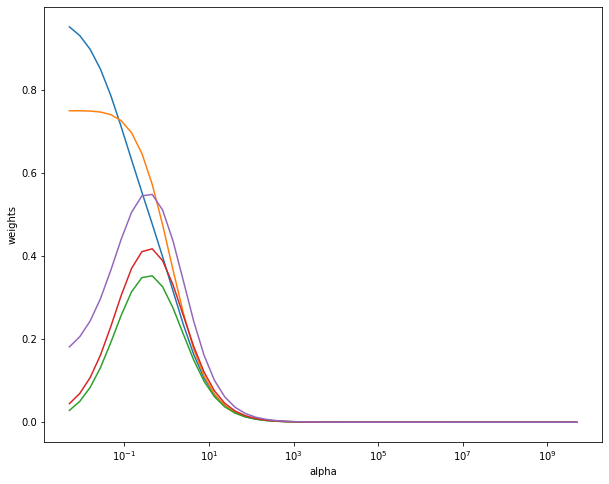

In [24]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [25]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(features_train[['DEPARTURE_DELAY','TAXI_OUT','AIRLINE_DELAY_NEW','LATE_AIRCRAFT_DELAY_NEW','WEATHER_DELAY_NEW']], features_test)
ridgecv.alpha_

0.005

In [26]:
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(features_train[['DEPARTURE_DELAY','TAXI_OUT','AIRLINE_DELAY_NEW','LATE_AIRCRAFT_DELAY_NEW','WEATHER_DELAY_NEW']], features_test)
mean_squared_error(delay_test, ridge4.predict(delay_train[['DEPARTURE_DELAY','TAXI_OUT','AIRLINE_DELAY_NEW','LATE_AIRCRAFT_DELAY_NEW','WEATHER_DELAY_NEW']]))

119.11442820198191

In [27]:
pd.Series(ridge4.coef_,index=features_train[['DEPARTURE_DELAY','TAXI_OUT','AIRLINE_DELAY_NEW','LATE_AIRCRAFT_DELAY_NEW','WEATHER_DELAY_NEW']].columns)

DEPARTURE_DELAY            0.950628
TAXI_OUT                   0.749004
AIRLINE_DELAY_NEW          0.028523
LATE_AIRCRAFT_DELAY_NEW    0.044688
WEATHER_DELAY_NEW          0.181319
dtype: float64

In [28]:
predicted_delay=ridge4.predict(delay_train[['DEPARTURE_DELAY','TAXI_OUT','AIRLINE_DELAY_NEW','LATE_AIRCRAFT_DELAY_NEW','WEATHER_DELAY_NEW']])
predicted_delay=pd.DataFrame(predicted_delay)
predicted_delay.columns=['Predicted_Arrival_Delay']
predicted_delay.head()

,Predicted_Arrival_Delay
0,-2.642002
1,116.004350
2,-6.297173
3,-8.024030
4,-8.297997


# **First 5 actual vs predicted arrival delay is shown in the following dataframe**


In [29]:
predicted_delay.reset_index(drop=True, inplace=True)
df2=pd.DataFrame(delay_test)
df2.reset_index(drop=True, inplace=True)

predicted_delay = pd.concat( [predicted_delay, df2], axis=1) 
predicted_delay.head()

,Predicted_Arrival_Delay,ARRIVAL_DELAY
0,-2.642002,8.0
1,116.004350,113.0
2,-6.297173,3.0
3,-8.024030,-12.0
4,-8.297997,-3.0


In [0]:

#y_axis=predicted_delay['Predicted_Arrival_Delay'][-100:]
#y_axis2=predicted_delay['ARRIVAL_DELAY'][-100:]
#plt.figure(figsize=(20,15))
#plt.scatter(range(100),y_axis)
#plt.scatter(range(100),y_axis2)
#plt.title('Actual_ARRIVAL_DELAY vs Predicted_Arrival_Delay')
#plt.show()

In [0]:
#fig, ax = plt.subplots(figsize=(15,15))
#y_axis=predicted_delay['Predicted_Arrival_Delay'][-100:]
#y_axis2=predicted_delay['ARRIVAL_DELAY'][-100:]
#ax.scatter(range(100),y_axis,label='Predicted_Arrival_Delay')
#ax.scatter(range(100),y_axis2,label='ARRIVAL_DELAY')
#plt.title('Actual_ARRIVAL_DELAY vs Predicted_Arrival_Delay')
#ax.legend()


## **I have plotted the actual arrival delay vs respective predicted arrival delay of the first 100 data points of the test.It is not totally concurrent but most are quite close.**


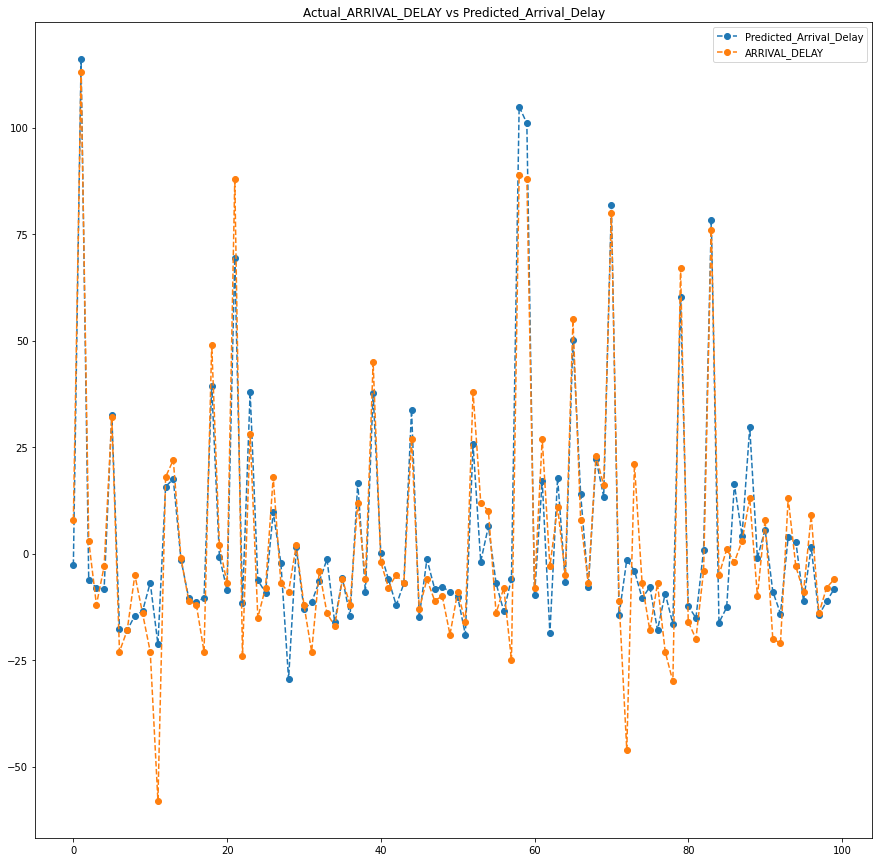

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
y_axis=predicted_delay['Predicted_Arrival_Delay'][:100]
y_axis2=predicted_delay['ARRIVAL_DELAY'][:100]
ax.plot(range(100),y_axis,label='Predicted_Arrival_Delay',marker='o',linestyle='--')
ax.plot(range(100),y_axis2,label='ARRIVAL_DELAY',marker='o',linestyle='--')
plt.title('Actual_ARRIVAL_DELAY vs Predicted_Arrival_Delay')
ax.legend()


In [32]:
delay_train2=delay_train.copy()
predicted_delay.reset_index(drop=True, inplace=True)
delay_train2.reset_index(drop=True, inplace=True)
delay_train2 = pd.concat( [delay_train2,predicted_delay['Predicted_Arrival_Delay']], axis=1) 
delay_train2.head()

,Date,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DISTANCE,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,TAXI_IN,TAXI_OUT,AIRLINE_DELAY_NEW,LATE_AIRCRAFT_DELAY_NEW,WEATHER_DELAY_NEW,MONTH,DAY,DAY_OF_WEEK,Predicted_Arrival_Delay
0,2015-01-12,SJC,13:35,13:44,9.0,SAN,14:50,14:58,8.0,417,WN,4200,N7744A,3.0,7.0,12.74,7.09,-1.37,1,12,1,-2.642002
1,2015-12-24,ATL,17:30,19:38,128.0,BWI,19:13,21:06,113.0,577,NK,824,N507NK,8.0,9.0,34.00,78.00,0.00,12,24,4,116.004350
2,2015-02-14,MIA,12:25,12:21,-4.0,SJU,15:58,16:01,3.0,1045,AA,1613,N3CBAA,17.0,19.0,12.67,2.46,-1.79,2,14,6,-6.297173
3,2015-12-02,RNO,06:20,06:16,-4.0,PHX,09:07,08:55,-12.0,601,AA,460,N807AW,3.0,17.0,12.72,2.46,-3.06,12,2,3,-8.024030
4,2015-03-24,MCI,08:00,08:01,1.0,MDW,09:20,09:17,-3.0,405,WN,1790,N749SW,6.0,10.0,12.67,4.24,-2.30,3,24,2,-8.297997


In [0]:
edges= [(row['ORIGIN_AIRPORT'], row['DESTINATION_AIRPORT'])for item, row in delay_train2[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].iterrows()]
route_graph= nx.Graph()
route_graph.add_edges_from(edges)

In [34]:
route_graph.size()

5995

# **In the following cell source_IATA contains all the IATA of the source airports and destination_IATA contains all the IATA of the destination air ports which can be used to fin the routes.**

In [0]:
source_IATA=[k[0] for k in edges]
destination_IATA =[k[1] for k in edges]
source_IATA=list(np.unique(np.array(source_IATA)))
destination_IATA=list(np.unique(np.array(destination_IATA)))


In [0]:
delay_train2['MONTH']=delay_train2['MONTH'].replace({1:'January',
                              2:'February',
                              3:'March',
                              4:'April',
                              5:'May',
                              6:'June',
                              7:'July',
                              8:'August',
                              9:'September',
                              10:'October',
                              11:'November',
                              12:'December'})
delay_train2['DAY_OF_WEEK']=delay_train2['DAY_OF_WEEK'].replace({1:'Sunday',
                                    2:'Monday',
                                    3:'Tuesday',
                                    4:'Wednesday',
                                    5:'Thursday',
                                    6:'Friday',
                                    7:'Saturday'})

In [37]:
column_names=['Date','MONTH','DAY_OF_WEEK','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','DESTINATION_AIRPORT','SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_DELAY','DISTANCE','AIRLINE','FLIGHT_NUMBER','TAIL_NUMBER','TAXI_IN','TAXI_OUT','AIRLINE_DELAY_NEW','LATE_AIRCRAFT_DELAY_NEW','WEATHER_DELAY_NEW','Predicted_Arrival_Delay','DAY']
delay_train2 = delay_train2.reindex(columns=column_names)
delay_train2.head()

,Date,MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DISTANCE,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,TAXI_IN,TAXI_OUT,AIRLINE_DELAY_NEW,LATE_AIRCRAFT_DELAY_NEW,WEATHER_DELAY_NEW,Predicted_Arrival_Delay,DAY
0,2015-01-12,January,Sunday,SJC,13:35,13:44,9.0,SAN,14:50,14:58,8.0,417,WN,4200,N7744A,3.0,7.0,12.74,7.09,-1.37,-2.642002,12
1,2015-12-24,December,Wednesday,ATL,17:30,19:38,128.0,BWI,19:13,21:06,113.0,577,NK,824,N507NK,8.0,9.0,34.00,78.00,0.00,116.004350,24
2,2015-02-14,February,Friday,MIA,12:25,12:21,-4.0,SJU,15:58,16:01,3.0,1045,AA,1613,N3CBAA,17.0,19.0,12.67,2.46,-1.79,-6.297173,14
3,2015-12-02,December,Tuesday,RNO,06:20,06:16,-4.0,PHX,09:07,08:55,-12.0,601,AA,460,N807AW,3.0,17.0,12.72,2.46,-3.06,-8.024030,2
4,2015-03-24,March,Monday,MCI,08:00,08:01,1.0,MDW,09:20,09:17,-3.0,405,WN,1790,N749SW,6.0,10.0,12.67,4.24,-2.30,-8.297997,24


# **Following are the fuctions reqired to get the desired result.**

In [0]:
import math
def compute_flight_distance(origin, destination):
    '''
    haversine formula for flight path computation
    '''
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return(d)
def find_all_shortest_paths(graph, source, destination):
    '''
    finds all the possible shortest paths for flying between two locations
    '''
    return([p for p in nx.all_shortest_paths(graph, source=source, target=destination)])

In [0]:
def get_all_shortest_paths_airport_names(route_graph, airports, source, destination):
    airports= airports.set_index('IATA_CODE')
    entries= []
    for path in find_all_shortest_paths(route_graph, source, destination):
        entries.append([dict(airports.loc[item])['CITY'] for item in path])
    return entries

In [0]:
def get_all_shortest_paths_IATA(route_graph, airports, source, destination):
    airports= airports.set_index('IATA_CODE')#this is important because later we try to extract city names using these IATA names
    
    entries2=find_all_shortest_paths(route_graph, source, destination)
    
    return entries2

In [0]:
def find_distance(airports,get_entries_iata):
  airports2= airports.copy()
  airports2=airports2.set_index('IATA_CODE')
  dist=[]

  for item in get_entries_iata:
    a=0.0
    for k in range(len(item)-1):
      a=a+compute_flight_distance((dict(airports2.loc[item[k]])['LATITUDE'],dict(airports2.loc[item[k]])['LONGITUDE']),(dict(airports2.loc[item[k+1]])['LATITUDE'],dict(airports2.loc[item[k+1]])['LONGITUDE']))
        #a=a+compute_flight_distance((dict(airports.loc[airports['IATA']==item[k]])['Lat'],dict(airports.loc[airports['IATA']==item[k]])['Long']),(dict(airports.loc[airports['IATA']==item[k+1]])['Lat'].mean(),dict(airports.loc[airports['IATA']==item[k+1]])['Long'].mean()))
      
    dist.append(a) 
  return dist

In [0]:
def get_delay_route_sum(get_entries_iata,month):
  delay_route=[]
  for k in range(len(get_entries_iata)):
    delay_sum=0
    for i in range(len(get_entries_iata[k])-1):
      if(len(get_entries_iata[k])==2):
        delay_sum=delay_sum+delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']==get_entries_iata[k][i]) & 
                              (delay_train2['DESTINATION_AIRPORT']==get_entries_iata[k][i+1]) & (delay_train2['MONTH']==month) ]['Predicted_Arrival_Delay'].min()
      else:
        delay_sum=delay_sum+delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']==get_entries_iata[k][i]) & 
                              (delay_train2['DESTINATION_AIRPORT']==get_entries_iata[k][i+1]) & (delay_train2['MONTH']==month) ]['Predicted_Arrival_Delay'].mean()
    delay_route.append(delay_sum) 

  return delay_route                           

In [0]:
def master_function(source_airport_IATA,destination_airport_IATA,month,airports):
  get_entries_airport=[]
  get_entries_airport=get_all_shortest_paths_airport_names(route_graph, airports,source_airport_IATA,destination_airport_IATA)
  get_entries_iata=[]
  get_entries_iata=get_all_shortest_paths_IATA(route_graph, airports,source_airport_IATA,destination_airport_IATA) 
  dist=[]
  dist=find_distance(airports,get_entries_iata)
  delay_route=[]
  delay_route= get_delay_route_sum(get_entries_iata,month)
  delay_route = ['NO FLIGHT IN THIS ROUTE IN THE ENTERED MONTH.' if math.isnan(x) else x for x in delay_route]
  #print(get_entries_airport)
  #print(get_entries_iata)
  #print(dist)
  #print(delay_route)
  all_in_one=list(zip(get_entries_airport,get_entries_iata,dist,delay_route))
  return all_in_one


## **Here is three consecutice example how we would get the output.**

**1.**

In [53]:
source_airport_IATA='HSV'
destination_airport_IATA='WRG'
month='June'
all_in_one=master_function(source_airport_IATA,destination_airport_IATA,month,airports)
print('Shortest {} routes between {} and {} in the format [Cities],[respective city IATA],[Total distance of the route],[Maximum predicted arrival delay in the whole route]-'.format(len(all_in_one),source_airport_IATA,destination_airport_IATA))
for i in range(len(all_in_one)): 
  print(all_in_one[i])
  print()
if len(all_in_one[0][0])==2:
  print('Flights avaailable in {} between {} and {} is a direct flight so the distance in all the routes are same.'.format(month,source_airport_IATA,destination_airport_IATA))
  print()
  print('Following flights are available on the selected month-')
  print(delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']=='SAN') & 
                           (delay_train2['DESTINATION_AIRPORT']=='MIA') & (delay_train2['MONTH']=='December')][['MONTH','DAY','DAY_OF_WEEK','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','ARRIVAL_TIME','DISTANCE','AIRLINE','FLIGHT_NUMBER']])
  print('Flight with minimum delay and traffic is-')
  print(all_in_one)
else:
  print()
  print('The shortest path(based on distance) between {} and {} and also flight available in {} is-'.format(source_airport_IATA,destination_airport_IATA,month))
  def sortSecond(val): 
    if type(val[3])==float:
      return math.ceil(val[2])  
    else:
      return 999999999999999
  all_in_one.sort(key = sortSecond,reverse=False)
  dist_sorted=all_in_one
  print(dist_sorted[0])
  print()
  print('The shortest path between {} and {} which has least delays and also flight available in {} is-'.format(source_airport_IATA,destination_airport_IATA,month))
  all_in_one2=all_in_one
  def sortThird(val): 
    if type(val[3])==float:
      return math.ceil(val[3]) 
    else:
      return 999999999999999
  all_in_one2.sort(key = sortThird,reverse=False)
  delay_sorted=all_in_one2 
  print(delay_sorted[0])
print('*****Negetive delay means filght has reached early.*****')

Shortest 8 routes between HSV and WRG in the format [Cities],[respective city IATA],[Total distance of the route],[Maximum predicted arrival delay in the whole route]-
(['Huntsville', 'Chicago', 'Seattle', 'Ketchikan', 'Wrangell'], ['HSV', 'ORD', 'SEA', 'KTN', 'WRG'], 4808.50208293244, 49.99314239736507)

(['Huntsville', 'Atlanta', 'Seattle', 'Ketchikan', 'Wrangell'], ['HSV', 'ATL', 'SEA', 'KTN', 'WRG'], 4972.441513407116, 11.120025302129472)

(['Huntsville', 'Houston', 'Seattle', 'Ketchikan', 'Wrangell'], ['HSV', 'IAH', 'SEA', 'KTN', 'WRG'], 5195.423568883605, -5.915278259936391)

(['Huntsville', 'Denver', 'Seattle', 'Ketchikan', 'Wrangell'], ['HSV', 'DEN', 'SEA', 'KTN', 'WRG'], 4553.581252049894, 7.659349593144624)

(['Huntsville', 'Detroit', 'Seattle', 'Ketchikan', 'Wrangell'], ['HSV', 'DTW', 'SEA', 'KTN', 'WRG'], 5211.124932135666, 'NO FLIGHT IN THIS ROUTE IN THE ENTERED MONTH.')

(['Huntsville', 'Dallas-Fort Worth', 'Seattle', 'Ketchikan', 'Wrangell'], ['HSV', 'DFW', 'SEA', 'KTN',

**2.**

In [58]:
source_airport_IATA='ANC'
destination_airport_IATA='CLT'
month='August'
all_in_one=master_function(source_airport_IATA,destination_airport_IATA,month,airports)
print('Shortest {} routes between {} and {} in the format [Cities],[respective city IATA],[Total distance of the route],[Maximum predicted arrival delay in the whole route]-'.format(len(all_in_one),source_airport_IATA,destination_airport_IATA))
for i in range(len(all_in_one)): 
  print(all_in_one[i])
  print()
if len(all_in_one[0][0])==2:
  print('Flights avaailable in {} between {} and {} is a direct flight so the distance in all the routes are same.'.format(month,source_airport_IATA,destination_airport_IATA))
  print()
  print('Following flights are available on the selected month-')
  print(delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']=='SAN') & 
                           (delay_train2['DESTINATION_AIRPORT']=='MIA') & (delay_train2['MONTH']=='December')][['MONTH','DAY','DAY_OF_WEEK','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','ARRIVAL_TIME','DISTANCE','AIRLINE','FLIGHT_NUMBER']])
  print('Flight with minimum delay and traffic is-')
  print(all_in_one)
else:
  print()
  print('The shortest path(based on distance) between {} and {} and also flight available in {} is-'.format(source_airport_IATA,destination_airport_IATA,month))
  def sortSecond(val): 
    if type(val[3])==float:
      return math.ceil(val[2])  
    else:
      return 999999999999999
  all_in_one.sort(key = sortSecond,reverse=False)
  dist_sorted=all_in_one
  print(dist_sorted[0])
  print()
  print('The shortest path between {} and {} which has least delays and also flight available in {} is-'.format(source_airport_IATA,destination_airport_IATA,month))
  all_in_one2=all_in_one
  def sortThird(val): 
    if type(val[3])==float:
      return math.ceil(val[3]) 
    else:
      return 999999999999999
  all_in_one2.sort(key = sortThird,reverse=False)
  delay_sorted=all_in_one2 
  print(delay_sorted[0])
print('*****Negetive delay means filght has reached early.*****')

Shortest 14 routes between ANC and CLT in the format [Cities],[respective city IATA],[Total distance of the route],[Maximum predicted arrival delay in the whole route]-
(['Anchorage', 'Minneapolis', 'Charlotte'], ['ANC', 'MSP', 'CLT'], 5538.065085324835, -5.313390890381272)

(['Anchorage', 'Seattle', 'Charlotte'], ['ANC', 'SEA', 'CLT'], 5986.058005395589, 10.347494268359846)

(['Anchorage', 'Los Angeles', 'Charlotte'], ['ANC', 'LAX', 'CLT'], 7183.341555426978, -2.6266533122971945)

(['Anchorage', 'San Francisco', 'Charlotte'], ['ANC', 'SFO', 'CLT'], 6930.87336036516, -3.918965026835437)

(['Anchorage', 'Chicago', 'Charlotte'], ['ANC', 'ORD', 'CLT'], 5532.96277687271, 31.51587530198377)

(['Anchorage', 'Portland', 'Charlotte'], ['ANC', 'PDX', 'CLT'], 6141.210025340336, -5.536467462990215)

(['Anchorage', 'Atlanta', 'Charlotte'], ['ANC', 'ATL', 'CLT'], 5852.436865225026, -3.394611922734476)

(['Anchorage', 'Phoenix', 'Charlotte'], ['ANC', 'PHX', 'CLT'], 6949.65236882099, 12.2486021540277

**3.When there is a direct route between source and destination.**

In [52]:
source_airport_IATA='SAN'
destination_airport_IATA='MIA'
month='June'
all_in_one=master_function(source_airport_IATA,destination_airport_IATA,month,airports)
print('Shortest {} routes between {} and {} in the format [Cities],[respective city IATA],[Total distance of the route],[Maximum predicted arrival delay in the whole route]-'.format(len(all_in_one),source_airport_IATA,destination_airport_IATA))
for i in range(len(all_in_one)): 
  print(all_in_one[i])
  print()
if len(all_in_one[0][0])==2:
  print('Flights avaailable in {} between {} and {} is a direct flight so the distance in all the routes are same.'.format(month,source_airport_IATA,destination_airport_IATA))
  print()
  print('Following flights are available on the selected month-')
  print()
  print(delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']==source_airport_IATA) & 
                           (delay_train2['DESTINATION_AIRPORT']==destination_airport_IATA) & (delay_train2['MONTH']==month)][['MONTH','DAY','DAY_OF_WEEK','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','ARRIVAL_TIME','Predicted_Arrival_Delay','DISTANCE','AIRLINE','FLIGHT_NUMBER']])
  print()
  print()
  print('Flight with minimum delay and traffic is-')
  print(delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']==source_airport_IATA) & 
                           (delay_train2['DESTINATION_AIRPORT']==destination_airport_IATA) & (delay_train2['MONTH']==month) & (delay_train2['Predicted_Arrival_Delay']==all_in_one[0][3])][['MONTH','DAY','DAY_OF_WEEK','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','ARRIVAL_TIME','Predicted_Arrival_Delay','DISTANCE','AIRLINE','FLIGHT_NUMBER']])
else:
  print()
  print('The shortest path(based on distance) between {} and {} and also flight available in {} is-'.format(source_airport_IATA,destination_airport_IATA,month))
  def sortSecond(val): 
    if type(val[3])==float:
      return math.ceil(val[2])  
    else:
      return 999999999999999
  all_in_one.sort(key = sortSecond,reverse=False)
  dist_sorted=all_in_one
  print(dist_sorted[0])
  print()
  print('The shortest path between {} and {} which has least delays and also flight available in {} is-'.format(source_airport_IATA,destination_airport_IATA,month))
  all_in_one2=all_in_one
  def sortThird(val): 
    if type(val[3])==float:
      return math.ceil(val[3]) 
    else:
      return 999999999999999
  all_in_one2.sort(key = sortThird,reverse=False)
  delay_sorted=all_in_one2 
  print(delay_sorted[0])
print('*****Negetive delay means filght has reached early.*****')

Shortest 1 routes between SAN and MIA in the format [Cities],[respective city IATA],[Total distance of the route],[Maximum predicted arrival delay in the whole route]-
(['San Diego', 'Miami'], ['SAN', 'MIA'], 3642.521040255352, -15.747400521769856)

Flights avaailable in June between SAN and MIA is a direct flight so the distance in all the routes are same.

Following flights are available on the selected month-

        MONTH  DAY DAY_OF_WEEK ORIGIN_AIRPORT SCHEDULED_DEPARTURE ARRIVAL_TIME  Predicted_Arrival_Delay  DISTANCE AIRLINE  FLIGHT_NUMBER
361638   June    5    Thursday            SAN               22:10        19:40               778.202482      2267      AA           1042
366300   June    8      Sunday            SAN               22:10        05:44               -14.893415      2267      AA           1042
567766   June   22      Sunday            SAN               22:10        06:10               -10.104893      2267      AA           1042
961916   June   11   Wednesday     

# **Run the next part and enter source and destination IATA and month of travel to get the shortest routes**

In [57]:
source_airport_IATA=input("Enter source IATA(all capital)- ")
destination_airport_IATA=input("Enter destination IATA(all capital)- ")
month=input("Enter month of travel(only first letter capital)- ")
all_in_one=master_function(source_airport_IATA,destination_airport_IATA,month,airports)
print('Shortest {} routes between {} and {} in the format [Cities],[respective city IATA],[Total distance of the route],[Maximum predicted arrival delay in the whole route]-'.format(len(all_in_one),source_airport_IATA,destination_airport_IATA))
for i in range(len(all_in_one)): 
  print(all_in_one[i])
  print()
if len(all_in_one[0][0])==2:
  print('Flights avaailable in {} between {} and {} is a direct flight so the distance in all the routes are same.'.format(month,source_airport_IATA,destination_airport_IATA))
  print()
  print('Following flights are available on the selected month-')
  print(delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']=='SAN') & 
                           (delay_train2['DESTINATION_AIRPORT']=='MIA') & (delay_train2['MONTH']=='December')][['MONTH','DAY','DAY_OF_WEEK','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','ARRIVAL_TIME','DISTANCE','AIRLINE','FLIGHT_NUMBER']])
  print('Flight with minimum delay and traffic is-')
  print(all_in_one)
else:
  print()
  print('The shortest path(based on distance) between {} and {} and also flight available in {} is-'.format(source_airport_IATA,destination_airport_IATA,month))
  def sortSecond(val): 
    if type(val[3])==float:
      return math.ceil(val[2])  
    else:
      return 999999999999999
  all_in_one.sort(key = sortSecond,reverse=False)
  dist_sorted=all_in_one
  print(dist_sorted[0])
  print()
  print('The shortest path between {} and {} which has least delays and also flight available in {} is-'.format(source_airport_IATA,destination_airport_IATA,month))
  all_in_one2=all_in_one
  def sortThird(val): 
    if type(val[3])==float:
      return math.ceil(val[3]) 
    else:
      return 999999999999999
  all_in_one2.sort(key = sortThird,reverse=False)
  delay_sorted=all_in_one2 
  print(delay_sorted[0])
print('*****Negetive delay means filght has reached early.*****')

Enter source IATA(all capital)- ANC
Enter destination IATA(all capital)- CLT
Enter month of travel(only first letter capital)- August
Shortest 14 routes between ANC and CLT in the format [Cities],[respective city IATA],[Total distance of the route],[Maximum predicted arrival delay in the whole route]-
(['Anchorage', 'Minneapolis', 'Charlotte'], ['ANC', 'MSP', 'CLT'], 5538.065085324835, -5.313390890381272)

(['Anchorage', 'Seattle', 'Charlotte'], ['ANC', 'SEA', 'CLT'], 5986.058005395589, 10.347494268359846)

(['Anchorage', 'Los Angeles', 'Charlotte'], ['ANC', 'LAX', 'CLT'], 7183.341555426978, -2.6266533122971945)

(['Anchorage', 'San Francisco', 'Charlotte'], ['ANC', 'SFO', 'CLT'], 6930.87336036516, -3.918965026835437)

(['Anchorage', 'Chicago', 'Charlotte'], ['ANC', 'ORD', 'CLT'], 5532.96277687271, 31.51587530198377)

(['Anchorage', 'Portland', 'Charlotte'], ['ANC', 'PDX', 'CLT'], 6141.210025340336, -5.536467462990215)

(['Anchorage', 'Atlanta', 'Charlotte'], ['ANC', 'ATL', 'CLT'], 585

In [0]:

#delay_count=[]
#def get_delay_sum(get_entries_iata_copy,get_entries_airport_copy,dist_copy,month_name):
#  for k in range(len(get_entries_iata_copy)):
 #   a_sum=0
  #  a=0
  #  for i in range(len(get_entries_iata_copy[k])-1):
  #    if(len(get_entries_iata_copy)==2):
  #      a=delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']==get_entries_iata_copy[k][i]) & 
  #                         (delay_train2['DESTINATION_AIRPORT']==get_entries_iata_copy[k][i+1]) & (delay_train2['MONTH']==month_name)]['Predicted_Arrival_Delay'].min()
  #      a_sum=a_sum+a                  
   #   else:
   #        a=delay_train2.loc[(delay_train2['ORIGIN_AIRPORT']==get_entries_iata_copy[k][i]) & 
    #                          (delay_train2['DESTINATION_AIRPORT']==get_entries_iata_copy[k][i+1]) & (delay_train2['MONTH']==month_name)]['Predicted_Arrival_Delay'].max() 
    #        
     # if math.isnan(a):
     #   get_entries_iata.remove(get_entries_iata[k])
     #   get_entries_airport.remove(get_entries_airport[k])
     #   dist.remove(dist_copy[k])
     #   break

      #else:
      #  a_sum=a_sum+a
      #  if(i==len(get_entries_iata_copy[k])-2):
      #    delay_count.append(a_sum)
        

In [0]:
#delay_count=[]
#get_entries_iata_copy=get_entries_iata
#dist_copy=dist
#get_entries_airport_copy=get_entries_airport
#get_delay_sum(get_entries_iata_copy,get_entries_airport_copy,dist_copy,'March')#March
#delay_count